1. Tentukan library yang digunakan

In [1901]:
import numpy as np
import pandas as pd
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt

# skicit learn
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

from collections import Counter

# imbalance learn undersample
from imblearn.under_sampling import RandomUnderSampler

2. Data Understanding / data aquisiton

In [1902]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [1903]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


menghitung jumlah baris dan kolom dengan .shape :

In [1904]:
diabetes_dataset.shape

(768, 9)

menampilkan informasi dataset yang ada pada dataframe :

In [1905]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


menghitung jumlah fitur dataset :

In [1906]:
# daftar fitur / kolom dataset
features = list(diabetes_dataset.columns)
print(features)
# konstanta jumlah fitur / kolom dataset
num_of_feature = len(features)
print(num_of_feature)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
9


menghitung class outcome untuk melihat perbandingan class positif dan class negatif :

In [1907]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

3. Data preprocessing

3.1 Data visualisasi :

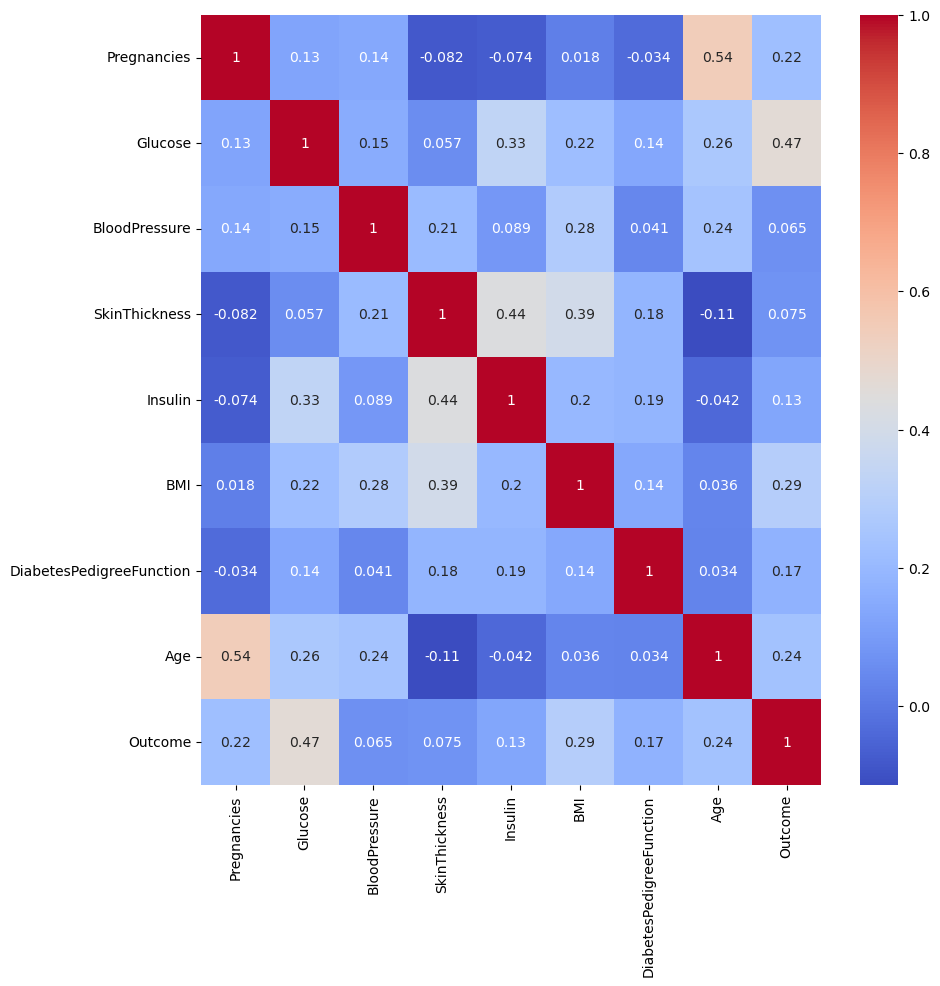

In [1908]:
plt.figure(figsize = (10,10))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap=plt.cm.coolwarm)
plt.show()

Dari visualisasi tersebut didapatkan bahwa nilai korelasi fitur paling tinggi adalah antara 'Age' dan 'Pregnancies' yaitu sebesar 0,54. Korelasi fitur tertinggi terhadap 'outcome' atau label ada fitur 'glucose' dimana memiliki nilai korelasi 0.47

3.2 Cleaning Data missing value
sebelum melakukan data balancing, perlu adanya validasi data apakah terdapat missing value / null pada dataset :

In [1909]:
columnScore = {}
for i in range(0, num_of_feature -1):
    columnScore[features[i]] = len(diabetes_dataset[diabetes_dataset[features[i]] == 0].index) / diabetes_dataset[features[i]].shape[0]

# pd.DataFrame(columnScore)
print(columnScore)

{'Pregnancies': 0.14453125, 'Glucose': 0.006510416666666667, 'BloodPressure': 0.045572916666666664, 'SkinThickness': 0.2955729166666667, 'Insulin': 0.4869791666666667, 'BMI': 0.014322916666666666, 'DiabetesPedigreeFunction': 0.0, 'Age': 0.0}


dapat dilihat pada informasi diatas pada fitur insulin didapatkan nilai missing value paling tinggi sedangkan fitur 'Age' dan 'DiabetesPredigreeFunction' tidak ditemukan adanya missing value.

Selanjutnya adalah menyeleksi fitur dengan membandingkan korelasi fitur terhadap target dan nilai presentase missing value :

In [1910]:
target = {}
for i in range(0, num_of_feature -1):
    target[features[i]] = diabetes_dataset[features[num_of_feature -1]].corr(diabetes_dataset[features[i]])

avg_target = sum(target.values()) / len(target)


menghapus fitur dengan presentase missing value lebih dari 20% :

In [1911]:
for i in range(0, num_of_feature -1):
    if(columnScore[features[i]] > 0.2 and target[features[i]]):
        diabetes_dataset.drop(features[i],inplace=True, axis=1)

didapatkan output daftar fitur yang telah terseleksi karena memiliki missing value sebesar 20% :

In [1912]:
features = list(diabetes_dataset.columns)
num_of_feature = len(features)
print(features)
print(num_of_feature)

['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
7


In [1913]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [1914]:
diabetes_dataset.shape

(768, 7)

setelah menghapus fitur yang memiliki banyak missing value, cek kembali baris data yang memiliki missing value

In [1915]:
listIndex = []

for i in range(0,num_of_feature - 1):
    listIndex.append(list(diabetes_dataset[diabetes_dataset[features[i]]==0].index))

rowsNewWithMV = set(listIndex[0])

data_frame_new = diabetes_dataset.drop(rowsNewWithMV)

In [1916]:
data_frame_new

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
5,5,116,74,25.6,0.201,30,0
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


In [1917]:
data_frame_new.head(20)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
5,5,116,74,25.6,0.201,30,0
6,3,78,50,31.0,0.248,26,1
7,10,115,0,35.3,0.134,29,0
8,2,197,70,30.5,0.158,53,1
9,8,125,96,0.0,0.232,54,1
10,4,110,92,37.6,0.191,30,0


In [1918]:
data_frame_new.shape

(657, 7)

3.3 Transformasi Data

Proses transformasi data dilakukan agar lebih mudah saat pengolahan data pada proses mining

In [1919]:
def groupPregnancies(pgn):
    if pgn > 0 and pgn < 6:
        return 0
    else:
        return 1
data_frame_new['Pregnancies'] = data_frame_new['Pregnancies'].apply(lambda x: groupPregnancies(x))

def groupGlucose(glc):
    if glc > 0 and glc < 140:
        return 0
    elif glc >= 140 and glc <= 199:
        return 1
    else:
        return 2
data_frame_new['Glucose'] = data_frame_new['Glucose'].apply(lambda x: groupGlucose(x))

def groupBloodPressure(bp):
    if bp > 0 and bp < 80:
        return 0
    elif bp >= 80 and bp <= 89:
        return 1
    else:
        return 2
data_frame_new['BloodPressure'] = data_frame_new['BloodPressure'].apply(lambda x: groupBloodPressure(x))

def groupBMI(bmi):
    if bmi > 0 and bmi < 18.5:
        return 0
    elif bmi >= 18.5 and bmi <= 22.9:
        return 1
    elif bmi >= 23 and bmi <= 29.0:
        return 2
    else:
        return 3
data_frame_new['BMI'] = data_frame_new['BMI'].apply(lambda x: groupBMI(x))

def groupDiabetesPedigreeFunction(dpf):
    if dpf > 0 and dpf < 0.376:
        return 0
    else:
        return 1
data_frame_new['DiabetesPedigreeFunction'] = data_frame_new['DiabetesPedigreeFunction'].apply(lambda x: groupDiabetesPedigreeFunction(x))

def groupAge(age):
    if age > 0 and age < 25:
        return 0
    if age >= 26 and age <= 45:
        return 1
    if age >= 46 and age <= 65:
        return 2
    else:
        return 3
data_frame_new['Age'] = data_frame_new['Age'].apply(lambda x: groupAge(x))

In [1920]:
data_frame_new.head(20)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,1,0,3,1,2,1
1,0,0,0,2,0,1,0
2,1,1,0,2,1,1,1
3,0,0,0,2,0,0,0
5,0,0,0,2,0,1,0
6,0,0,0,3,0,1,1
7,1,0,2,3,0,1,0
8,0,1,0,3,0,2,1
9,1,0,2,3,0,2,1
10,0,0,2,3,0,1,0


3.4 Data Balancing dengan undersample

In [1921]:
# cek kembali jumlah class 0 dan class 1
data_frame_new['Outcome'].value_counts()

Outcome
0    427
1    230
Name: count, dtype: int64

In [1922]:
# # memisahkan data dan label (variabel X dan Y)
x = data_frame_new.drop(columns='Outcome', axis=1)
y = data_frame_new['Outcome']

In [1923]:
# undersample dengan mengurangi class mayoritas 0 agar sama dengan class 1
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 230), (1, 230)] (460,)


In [1924]:
# jumlah class 0 dan class 1 setelah undersample
x_resampled.value_counts()
y_resampled.value_counts()

Outcome
0    230
1    230
Name: count, dtype: int64

In [1925]:
# jumlah baris X
print(x_resampled.shape)

(460, 6)


In [1926]:
# jumlah baris y
print(y_resampled.shape)

(460,)


3.5 Pembagian Data

In [1927]:
# Memisahkan data training dan data testing
x_train , x_test , y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.1, stratify=y_resampled, random_state=2)

In [1928]:
print(x_resampled.shape , x_train.shape, x_test.shape)

(460, 6) (414, 6) (46, 6)


3.6 Normalisasi data

In [1929]:
scale_x = MinMaxScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

# print(x_train)
# print(x_test)


4. Membuat data train menggunakan Algoritma Random Forest

In [1930]:
rf = RandomForestClassifier()

In [1931]:
rf.fit(x_train, y_train)

RandomForestClassifier()

5. Modelling untuk mengukur tingkat Akurasi

In [1932]:
x_train_prediction = rf.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [1933]:
print('Akurasi Data Training = ', training_data_accuracy)

Akurasi Data Training =  0.7681159420289855


In [1934]:
x_test_prediction = rf.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [1935]:
print('Akurasi Data Testing = ', test_data_accuracy)

Akurasi Data Testing =  0.8695652173913043


6. Hyperparameter Tuning & Confusion Matrix

In [1936]:
# start 50 stop 500
param_dist = {'n_estimators': randint(50,500),'max_depth': randint(1,20)}


# Menggunakan RandomizedSearchCV untuk mencari hyperparameters terbaik
rand_search = RandomizedSearchCV(rf,  param_distributions = param_dist, n_iter=5, cv=5)

# Fit random search dengan data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000280DF545580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000280E326DFA0>})

In [1937]:
# Buat variabel untuk model terbaik
best_rf = rand_search.best_estimator_

# Print hyperparameters terbaik
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 124}


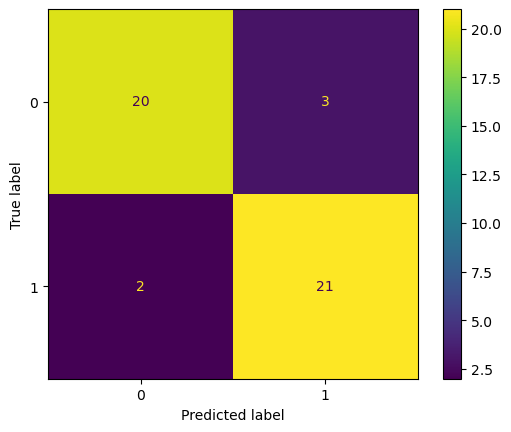

In [1938]:
y_pred = best_rf.predict(x_test)

# Buat the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [1939]:
y_pred = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Akurasi : ", accuracy)
print("Presisi : ", precision)
print("Recall : ", recall)

Akurasi :  0.8913043478260869
Presisi :  0.875
Recall :  0.9130434782608695


8. Simpan Model

In [1940]:
import pickle 

In [1941]:
filename = 'diabetes_model.sav'
pickle.dump(rf, open(filename,'wb'))